<a href="https://colab.research.google.com/github/Preet28/Fake-Review-Detection/blob/main/word_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Preet28/Fake-Review-Detection.git

Cloning into 'Fake-Review-Detection'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 30 (delta 14), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (30/30), 471.14 KiB | 3.37 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [2]:
import pandas as pd
import nltk
import string
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
df = pd.read_csv("/content/Fake-Review-Detection/deceptive-opinion.csv")
df.head(4)

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...


In [4]:
# Removing unnecessary columns
df = df.drop(['hotel', 'polarity','source'], axis=1)
df.head(2)

,deceptive,text
0,truthful,We stayed for a one night getaway with family ...
1,truthful,Triple A rate with upgrade to view room was le...


In [5]:
# Downloading stopwords
nltk.download('stopwords')

# Getting the English stopwords list
stopwords = set(stopwords.words('english'))

# Clean the text data
def clean_text(text):
    # Removing punctuation
    text = re.sub('[^\w\s]', '', text)
    # Converting to lowercase
    text = text.lower()
    # Removing stopwords
    text = ' '.join([word for word in text.split() if word not in stopwords])
    return text

df['text'] = df['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
df['text'].tail(4)

1596    amalfi hotel beautiful website interior decora...
1597    intercontinental chicago magnificent mile outs...
1598    palmer house hilton looks good pictures outsid...
1599    former chicagoan im appalled amalfi hotel chic...
Name: text, dtype: object

In [10]:
truthful_reviews = df[df['deceptive'] == 'truthful']
deceptive_reviews = df[df['deceptive'] == 'deceptive']
print(truthful_reviews.head(5))

  deceptive                                               text
0  truthful  stayed one night getaway family thursday tripl...
1  truthful  triple rate upgrade view room less 200 also in...
2  truthful  comes little late im finally catching reviews ...
3  truthful  omni chicago really delivers fronts spaciousne...
4  truthful  asked high floor away elevator got room pleasa...


In [14]:
# combined truthful and deceptive reviews into distinct strings
truthful_text = " ".join(review for review in truthful_reviews['text'])
deceptive_text = " ".join(review for review in deceptive_reviews['text'])

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [19]:
# wordcloud for truthful reviews
truthful_wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(truthful_text)

# wordcloud for deceptive reviews
deceptive_wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(deceptive_text)

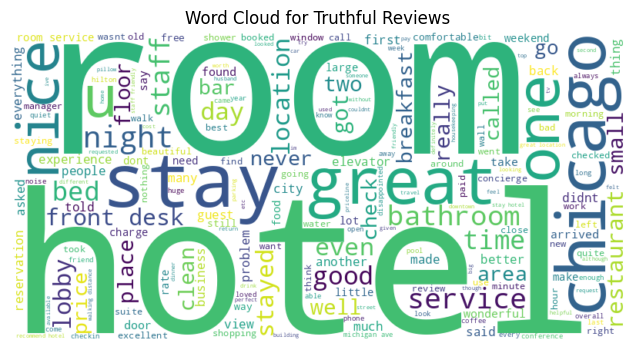

In [21]:
# Plot the WordCloud for truthful reviews
plt.figure(figsize=(8, 4))
plt.imshow(truthful_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Truthful Reviews')
plt.axis('off')
plt.show()

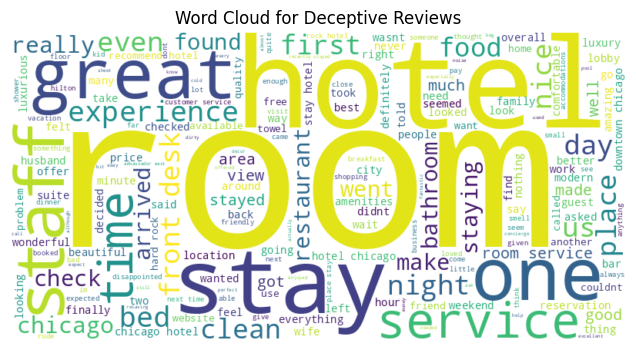

In [22]:
# Plot the WordCloud for deceptive reviews
plt.figure(figsize=(8, 4))
plt.imshow(deceptive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Deceptive Reviews')
plt.axis('off')
plt.show()